In [4]:
import yfinance as yf
import numpy as np
from statistics import mean
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [5]:
# Define Constants

tick_symbol = 'AAPL'

tick_period = '5y'

In [6]:
# Obtain and Extract Data

stock_data = yf.Ticker(tick_symbol)

hist_data = stock_data.history(tick_period).reset_index()

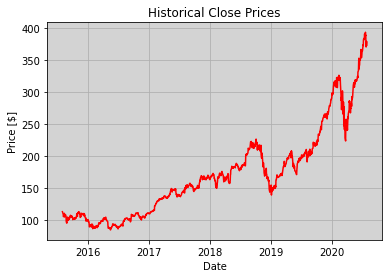

In [9]:
# Plot Historical Close Price Data

fig1 = plt.figure()
plt.ion()
ax = fig1.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor((0.15, 0.15, 0.15, 0.20))

plt.plot(hist_data['Date'],hist_data['Close'], 'r')
plt.xlabel('Date')
plt.ylabel('Price [$]')
plt.title('Historical Close Prices')
plt.grid()

plt.show(block=False)

In [10]:
# Best Fit Line - Close Price Data

num_data = len(hist_data['Close'])  # Number of Data Points
time_vec = np.linspace(0, num_data, num_data)


def close_best_fit(fit_degree):
    
    # Least Squares Fit
    poly_coeffs = np.polyfit(time_vec, hist_data['Close'], fit_degree)
    desc_poly = np.poly1d(poly_coeffs)
    
    # Error Calcs
    close_err = (desc_poly(time_vec) - hist_data['Close']) / hist_data['Close']
    
    return desc_poly, close_err   
    

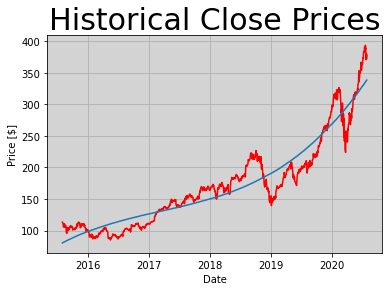

In [11]:
bf_poly, bf_err = close_best_fit(3)

fig1 = plt.figure()
plt.ion()
ax = fig1.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor((0.15, 0.15, 0.15, 0.20))

plt.plot(hist_data['Date'],hist_data['Close'], 'r')
plt.plot(hist_data['Date'], bf_poly(time_vec), 'b')
plt.xlabel('Date')
plt.ylabel('Price [$]')
plt.title('Historical Close Prices', size=30)
plt.grid()

plt.show(block=False)

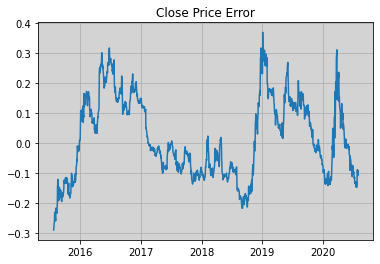

In [12]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_facecolor((0.15, 0.15, 0.15, 0.20))

plt.plot(hist_data['Date'], bf_err)
plt.title('Close Price Error')
plt.grid()

plt.show(block=False)

In [28]:
'''
Sum up error: 
    (+) means best-fit line over estimates
    (-) means best-fit line under estimates
'''

err_sum = bf_err.cumsum()

err_sum = np.array(err_sum)

err_sum[-1]

18.54652216803293